In [12]:
import pandas as pd
import glob

files = glob.glob("data/*.parquet")
df = pd.concat([pd.read_parquet(f) for f in files], ignore_index=True)

In [13]:
df.head()

,brand,model,color,seats,year,fuel,capacity,power,body_type,gearbox,...,accident_free,country_of_origin,title,price_pln,price_net_info,location,equipment,posted_date,description,url
0,Peugeot,Partner Furgon Long 950kg BlueHDi 130 KM,Biały,3,2024,Diesel,1 499 cm3,130 KM,Furgon (blaszak),Manualna,...,Tak,None,Peugeot Partner Furgon Long 950kg BlueHDi 130 KM,"98 141,70",(79 790PLN-Netto),"Zuzanny 36 - 41-219 Sosnowiec, Śląskie (Polska)",[],28 października 2025 12:41,Opis\nZgłoś\nGRUPA TANDEM\nul. Zuzanny 36\n41-...,https://www.otomoto.pl/dostawcze/oferta/peugeo...
1,Peugeot,Boxer,Biały,3,2022,Diesel,2 200 cm3,165 KM,Furgon (blaszak),Manualna,...,None,None,Peugeot Boxer,37 900,None,"Leszno, Wielkopolskie","[Dodatkowe wyposażenie, ABS, ASR (kontrola tra...",28 października 2025 12:41,"Opis\nZgłoś\nPEUGEOT BOXER L4H2 2,2 HDI 165MK ...",https://www.otomoto.pl/dostawcze/oferta/peugeo...
2,Mercedes-Benz,Sprinter,Czarny,3,2025,Diesel,1 950 cm3,190 KM,Do zabudowy,Automatyczna,...,Tak,Polska,Mercedes-Benz Sprinter,196 500,None,"Spadowa 4 - 42-262 Poczesna, częstochowski, Śl...","[Dodatkowe wyposażenie, 4x4, ABS, ASR (kontrol...",28 października 2025 12:39,Opis\nZgłoś\nMERCEDES-BENZ GRUPA WRÓBEL\nZapra...,https://www.otomoto.pl/dostawcze/oferta/merced...
3,Opel,Combo Cargo L1 1000kg 1.5diesel 102km MT6 2025r,Biały,2,2025,Diesel,1 498 cm3,102 KM,Furgon (blaszak),Manualna,...,Tak,None,Opel Combo Cargo L1 1000kg 1.5diesel 102km MT6...,87 945,(71 500PLN-Netto),"Poznańska 74 - 76-200 Słupsk, Pomorskie (Polska)",[],28 października 2025 12:39,"Opis\nZgłoś\nAutoryzowany salon marki Opel, fi...",https://www.otomoto.pl/dostawcze/oferta/opel-c...
4,Renault,Master,Biały,3,2017,Diesel,2 299 cm3,130 KM,Furgon (blaszak),Manualna,...,Tak,None,Renault Master,47 900,None,"Szarowizna 14 - 99-100 Łęczyca, łęczycki, Łódz...","[Dodatkowe wyposażenie, ABS, Immobilizer, Cent...",28 października 2025 12:39,Opis\nZgłoś\nNASZA AKTUALNA OFERTA DOSTĘPNA NA...,https://www.otomoto.pl/dostawcze/oferta/renaul...


## Valid unexpected data

### Valid high price offer

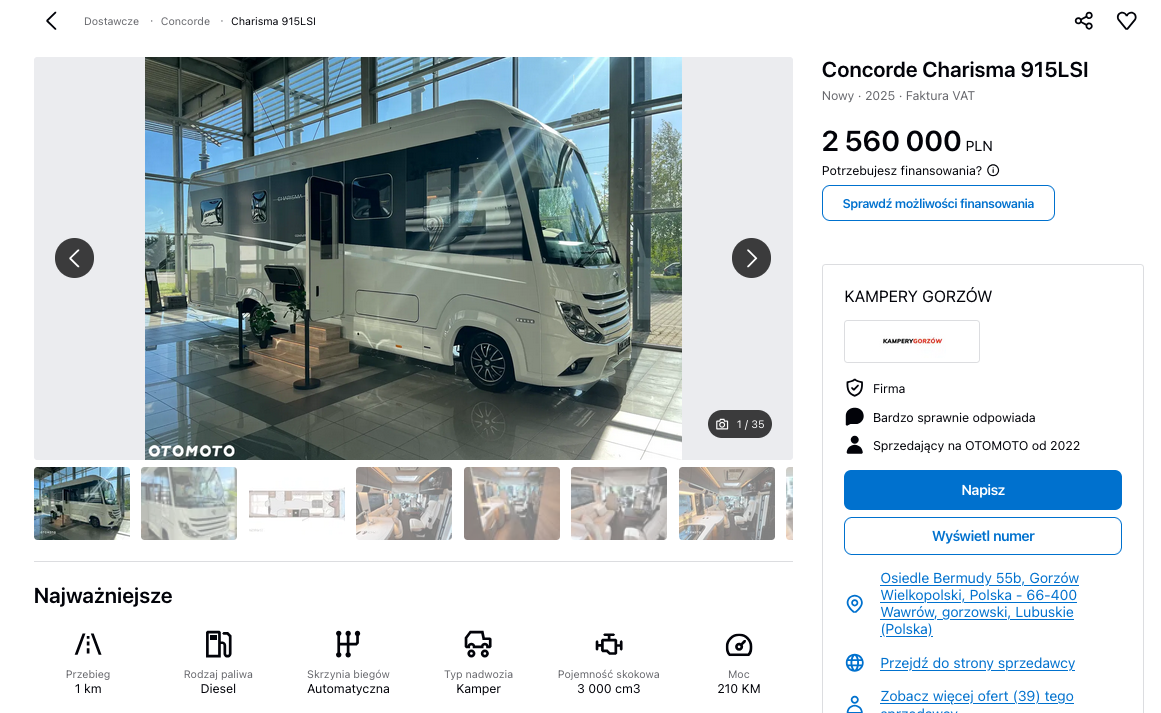

### Malfunctioning cars

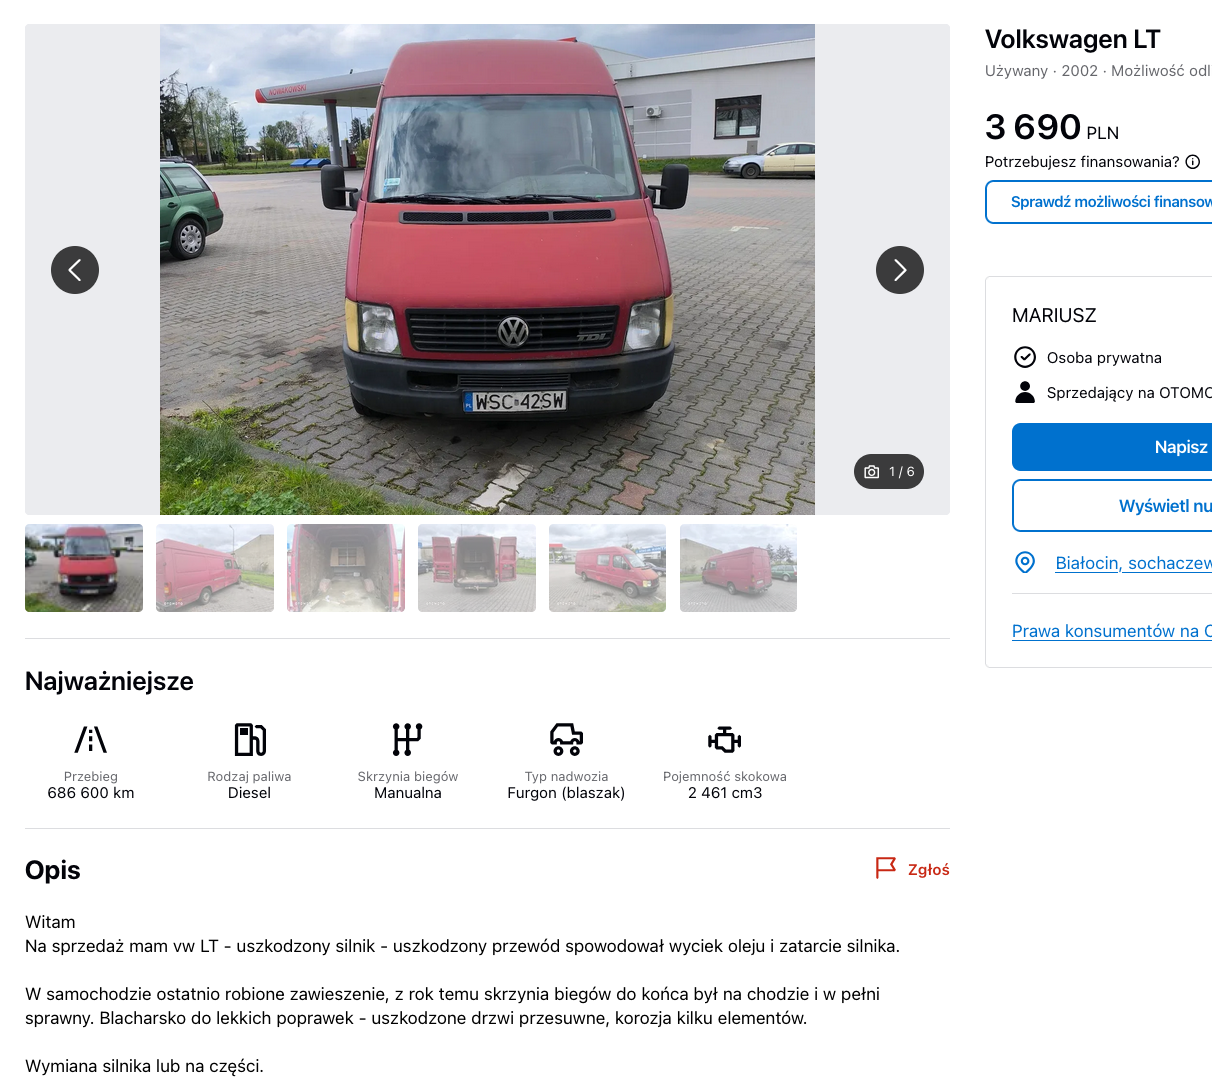

## Faulty data

### Low price in EUR (rent?)

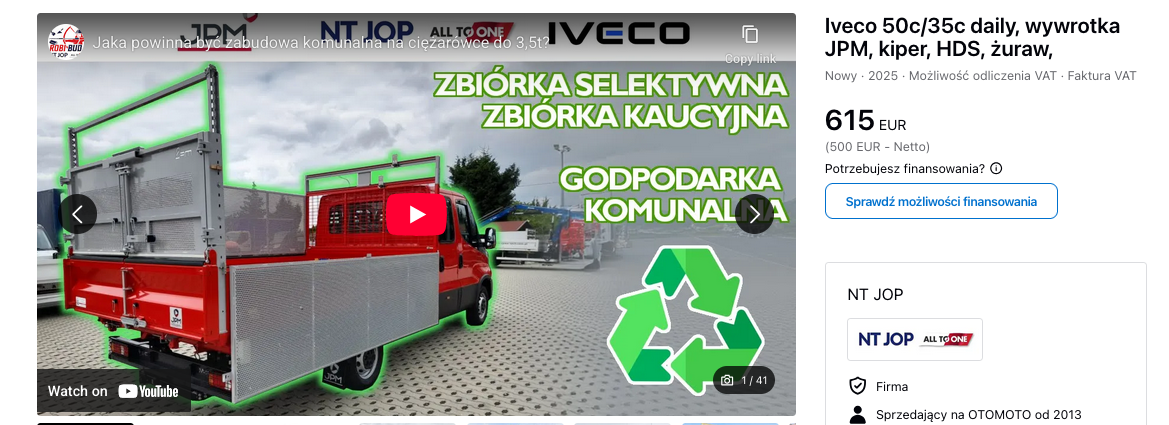

### Disappearing offers

Many low price offers are not available anymore, possibly they were taken down by the administration.


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

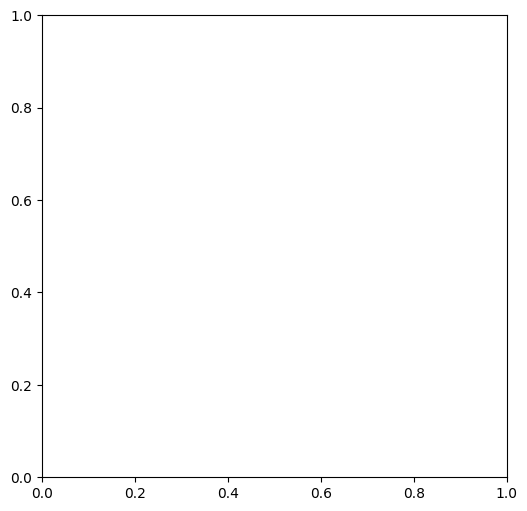

In [15]:
import matplotlib.pyplot as plt

# Example dataset
plt.figure(figsize=(6, 6))
plt.boxplot(df["price_pln"], vert=True)
plt.title("Price Distribution (Outliers in Red)")
plt.ylabel("Price")
plt.show()

## Data cleaning tasks

### Removed texts being part of UI

Remove first 2 and last 4 lines from each description string.

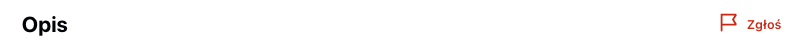

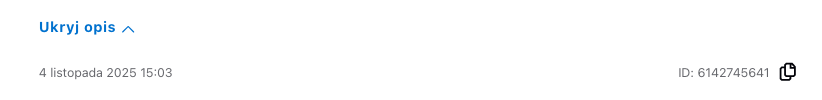

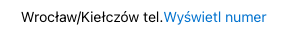

### Removed prices from descriptions

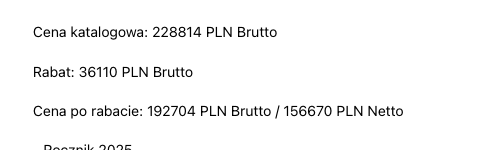

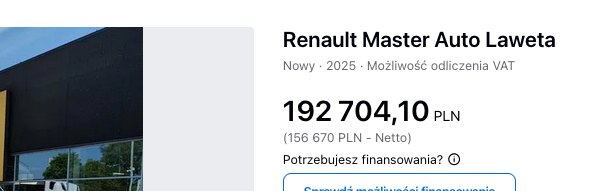

### Lemmatizaion/Normalization

We used `spacy` NLP library with `pl_core_news_sm` dictionary.

Before 

```
-silnik 2.3jtd 120km
-manulna 6-cio biegowa skrzynia
Przy przebiegu 320tys km został wymieniony kompletny rozrząd SKF , sprzęgło sachs , sprawdzanie wtrysków , napinacz +łańcuszek wałków rozrządu oryginał Iveco .
-wciągarka
-najazd 5m x 2.04m
-max rozstaw osi
-na haku 2.5t
```

After

```
2 120km 6 cio biegowy skrzynia przebieg 320tys wymienić kompletny rozrząd skfa sprzęgć sachs sprawdzać wtrysk napinacz wałk rozrząd oryginać iveco 5m 2.04m rozstaw oś hak 2
```

In [20]:
with pd.option_context("display.max_colwidth", None):
    print(df["description"].iloc[0])

Opis
Zgłoś
GRUPA TANDEM
ul. Zuzanny 36
41-219 Sosnowiec
 Chcesz potwierdzić dostępność oferty?
 Chcesz pozostawić swój aktualny pojazd w rozliczeniu w bezkonkurencyjnej propozycji cenowej?
 Chcesz poznać możliwości finansowania?
Z pewnością pomożemy Ci w tym! Skontaktuj się z nami:
Kamil Pasturczak:
Kom.:
Wyświetl numer
Mail: k.pasturczak(at)tandemplus.pl
Cena: 79 790,00 zł. netto
Powyższa cena obowiązuje przy zakupie auta w ofercie finansowania dealera - szczegóły u sprzedawcy!
Peugeot Partner Furgon Long 950kg
Silnik: BlueHDi 130 KM S&S M6
Lakier: Blanc ICY
Tapicerka: Tapicerka materiałowa CURITIBA
Elementy wyposażenia dodatkowego uwzględnione w cenie auta:
1. Pakiet Winter
- Szyba przednia podgrzewana (dolna część)
- Fotele podgrzewane kierowcy i pasażera (wersja 2-miejscowa)
- kierownica ze skóry ekologicznej
- fotel kierowcy KOMFORT (IT02)
2. Pakiet Style
- zderzak tylny w kolorze nadwozia
- obudowy lusterek bocznych i listwy boczne lakierowane kolorze czarnym
- klamki zewnętrz

In [21]:
!python -m spacy download pl_core_news_sm

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
  Using cached https://github.com/explosion/spacy-models/releases/download/pl_core_news_sm-3.8.0/pl_core_news_sm-3.8.0-py3-none-any.whl (20.2 MB)

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_sm')


In [26]:
import spacy
import re
from spacy.tokenizer import Tokenizer
from spacy.util import compile_infix_regex


nlp = spacy.load("pl_core_news_sm")

infixes = nlp.Defaults.infixes
infixes = [x for x in infixes if x not in [r"(?<=[0-9])[.,](?=[0-9])"]]
infix_re = compile_infix_regex(infixes)

def custom_tokenizer(nlp):
    token_match = re.compile(
        r"\d+[.,]?\d*\s?(km|kW|KM|kw|cm3|kg|mm|cm|m|r|tys)"
    ).match
    return Tokenizer(nlp.vocab)

nlp.tokenizer = custom_tokenizer(nlp)

nlp.tokenizer.infix_finditer = infix_re.finditer


def redact_prices_in_descriptions(row):
    price_raw = str(row["price_pln"]).replace(" ", "").replace(",", ".")

    try:
        price_float = float(price_raw)
        price_str = str(int(price_float))
    except ValueError:
        return row

    row["description"] = re.sub(
        rf"{re.escape(price_str)}\s*(zł|zl|pln|PLN)?",
        "",
        row["description"]
    )
    return row

def clean_text_pl(text):
    # lowercase
    text = text.lower()
    # remove URLs, emails, and non-letter chars
    text = re.sub(r"http\S+|www\S+|https\S+|\S*@\S*\s?", "", text)
    # text = re.sub(r"[^a-ząćęłńóśźż\s]", " ", text)

    # process text with spaCy
    doc = nlp(text)
    tokens = []
    
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        # keep numbers, measures, and non-stopword text
        if re.match(r"^\d+[.,]?\d*\s?(km|kw|cm3|kg|mm|cm|m|r|tys)?$", token.text, re.I):
            tokens.append(token.text)
        elif token.is_alpha and len(token) > 2:
            tokens.append(token.lemma_)

    return " ".join(tokens)


def clean_data(_df):
    df = _df.copy()
    df = df.apply(redact_prices_in_descriptions, axis=1)
    
    df["description"] = df["description"].apply(lambda x: "\n".join(x.splitlines()[2:-4]).replace("Wyświetl numer", ""))
    
    MIN_PRICE = 3000

    df["price_pln"] = pd.to_numeric(
        df["price_pln"].astype(str).str.replace(" ", "").str.replace(",", ".")
    )
    df = df[df["price_pln"] > MIN_PRICE]
    df['description'] = df['description'].apply(clean_text_pl)
    
    return df



In [27]:
clean_df = clean_data(df)
clean_df.to_csv('data/clean_data.csv')

KeyboardInterrupt: 

In [28]:
clean_df = pd.read_csv('data/clean_data.csv')

In [29]:
clean_df.head()['description']

0    kolor tapicerka czarny standard cesja leasing ...
1    fiat ducato 2 3 izoterma silnik diesel pojemno...
2    długość 4,50 szerokość 2,07 wysokość 2,00 siln...
3                                                  NaN
4                                                  NaN
Name: description, dtype: object

In [30]:
descs = df["description"]

In [31]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer()
tfidf_matrix = vectorizer.fit_transform(descs)

print(vectorizer.get_feature_names_out())
print(tfidf_matrix.toarray())

['00' '000' '0000' ... 'інше' 'історії' 'ｚａｐｒａｓｚａｍｙ']
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [32]:
list(vectorizer.get_feature_names_out())

['00',
 '000',
 '0000',
 '000000',
 '000000000271916',
 '000000004531200',
 '000000033095720',
 '000000038784590',
 '000002312726454',
 '00000270623c063',
 '0000166512',
 '00005801499165',
 '00005802379798',
 '00005802399106',
 '00005802828039',
 '00005802922677',
 '00009',
 '0000989518',
 '0001',
 '00012',
 '00017',
 '0002',
 '00022',
 '00023',
 '00047',
 '00049',
 '00056',
 '00085',
 '000989480417fdep',
 '0009899401aaa8p',
 '000cm3',
 '000kg',
 '000km',
 '000kmkm',
 '000mil',
 '000netto',
 '000pln',
 '000tkm',
 '000tys',
 '000tyś',
 '000wymieniony',
 '000z',
 '000zl',
 '000zł',
 '001',
 '00105',
 '00112',
 '00114',
 '00121',
 '00131',
 '00161',
 '00169',
 '00190',
 '00199',
 '001km',
 '002',
 '0020435840',
 '00223',
 '00226',
 '00249',
 '00251',
 '00259',
 '00267',
 '00282',
 '003',
 '0033',
 '003300',
 '00344',
 '00349',
 '0035',
 '00355',
 '003559',
 '003948',
 '004',
 '00401',
 '00411',
 '00418',
 '00420',
 '00424',
 '00436601966195',
 '00457',
 '00458',
 '00466',
 '004851100110',

#### Word Counts and Lengths

In [43]:
desc_lengths = descs.str.len()
word_counts = descs.str.split().apply(len)

print("Character count: mean", desc_lengths.mean(), "median", desc_lengths.median(), "min", desc_lengths.min(), "max", desc_lengths.max())
print("Word count: mean", word_counts.mean(), "median", word_counts.median(), "min", word_counts.min(), "max", word_counts.max())


Character count: mean 1571.6875905548811 median 1150.0 min 52 max 6244
Word count: mean 218.5290363002702 median 164.0 min 9 max 2179


#### Unique Words and Common Terms

In [36]:
unique_words_per_desc = descs.apply(lambda x: len(set(x.split())))
overall_unique_words = set(" ".join(descs).split())

print("Mean unique words per description:", unique_words_per_desc.mean())
print("Total unique words:", len(overall_unique_words))

Mean unique words per description: 170.30030935505346
Total unique words: 174141


#### Top 20 Common Words (excluding stopwords)

In [44]:
from collections import Counter
import spacy

nlp = spacy.load("pl_core_news_sm")
stopwords = nlp.Defaults.stop_words

words = [w for desc in descs for w in desc.split() if w not in stopwords]
common_words = Counter(words).most_common(20)
print("Top 20 words:", common_words)

Top 20 words: [('-', 160193), ('•', 41906), (':', 35668), ('numer', 28061), ('2025', 27986), ('Wyświetl', 27250), ('Opis', 25898), ('października', 25602), ('ID', 25567), ('Zgłoś', 25547), ('–', 23706), ('*', 22236), ('kierowcy', 19240), ('✔', 18854), ('W', 16729), ('+', 14736), (',', 14242), ('Auto', 12910), ('oferty', 12232), ('System', 11619)]


In [46]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,2), stop_words=list(stopwords))
X2 = vectorizer.fit_transform(descs)
bigrams = zip(vectorizer.get_feature_names_out(), X2.sum(axis=0).A1)
print("Top 10 bigrams:", sorted(bigrams, key=lambda x: -x[1])[:10])

vectorizer3 = CountVectorizer(ngram_range=(3,3), stop_words=list(stopwords))
X3 = vectorizer3.fit_transform(descs)
trigrams = zip(vectorizer3.get_feature_names_out(), X3.sum(axis=0).A1)
print("Top 10 trigrams:", sorted(trigrams, key=lambda x: -x[1])[:10])


Top 10 bigrams: [('wyświetl numer', np.int64(27336)), ('października 2025', np.int64(25546)), ('opis zgłoś', np.int64(25543)), ('kodeksu cywilnego', np.int64(10688)), ('stanowi oferty', np.int64(9389)), ('art 66', np.int64(9098)), ('skrzynia biegów', np.int64(7812)), ('66 kodeksu', np.int64(7634)), ('niniejsze ogłoszenie', np.int64(6747)), ('myśl art', np.int64(6727))]
Top 10 trigrams: [('art 66 kodeksu', np.int64(7618)), ('66 kodeksu cywilnego', np.int64(7612)), ('myśl art 66', np.int64(6599)), ('oferty myśl art', np.int64(6417)), ('stanowi oferty myśl', np.int64(6290)), ('odpowiada ewentualne błędy', np.int64(6228)), ('wyłącznie informacją handlową', np.int64(6115)), ('handlową stanowi oferty', np.int64(6058)), ('sprzedający odpowiada ewentualne', np.int64(6055)), ('niniejsze ogłoszenie wyłącznie', np.int64(6012))]


In [40]:
keywords = ["uszkodzony", "nowy", "serwis"]
for kw in keywords:
    count = descs.str.contains(kw, case=False).sum()
    print(f"Keyword '{kw}' found in {count} descriptions")

Keyword 'uszkodzony' found in 770 descriptions
Keyword 'nowy' found in 6717 descriptions
Keyword 'serwis' found in 9247 descriptions


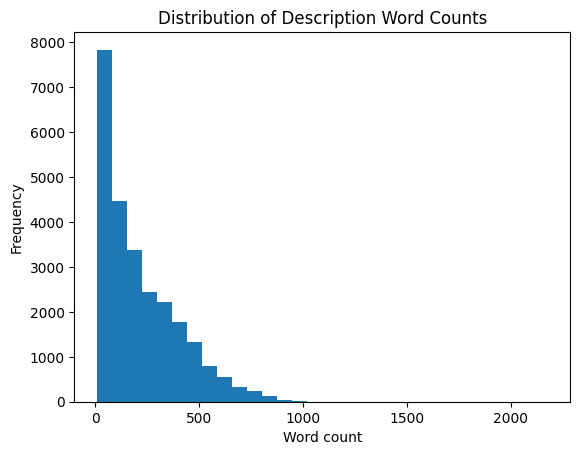

In [41]:
import matplotlib.pyplot as plt

plt.hist(word_counts, bins=30)
plt.title("Distribution of Description Word Counts")
plt.xlabel("Word count")
plt.ylabel("Frequency")
plt.show()

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=list(nlp.Defaults.stop_words))
tfidf_matrix = vectorizer.fit_transform(descs)

# Show feature names and TF-IDF matrix shape
print("TF-IDF matrix shape:", tfidf_matrix.shape)
print("Vocabulary size:", len(vectorizer.get_feature_names_out()))

# Example: Top 10 terms for the first description
import numpy as np
first_row = tfidf_matrix[10].toarray().flatten()
top_indices = np.argsort(first_row)[::-1][:10]
top_terms = [vectorizer.get_feature_names_out()[i] for i in top_indices if first_row[i] > 0]
print("Top TF-IDF terms for first description:", top_terms)


TF-IDF matrix shape: (25537, 86745)
Vocabulary size: 86745
Top TF-IDF terms for first description: ['6142177061', '38', '112', 'citan', 'widoczny', '2022r', '900zł', 'bogato', 'francji', 'cdi']


### Histogram of Unique Words per Description
This histogram shows the distribution of unique word counts across all descriptions.

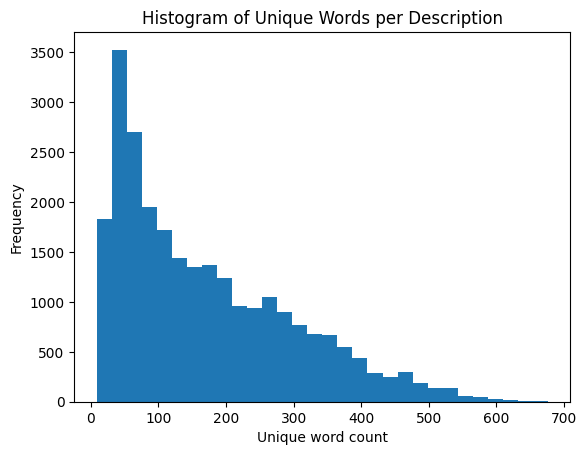

In [49]:
import matplotlib.pyplot as plt

unique_words_per_desc = descs.apply(lambda x: len(set(x.split())))
plt.hist(unique_words_per_desc, bins=30)
plt.title("Histogram of Unique Words per Description")
plt.xlabel("Unique word count")
plt.ylabel("Frequency")
plt.show()


## TF-IDF Heatmap of Top Terms vs. Sample Descriptions
This heatmap visualizes the TF-IDF scores of the top 20 terms across a random sample of 30 descriptions.

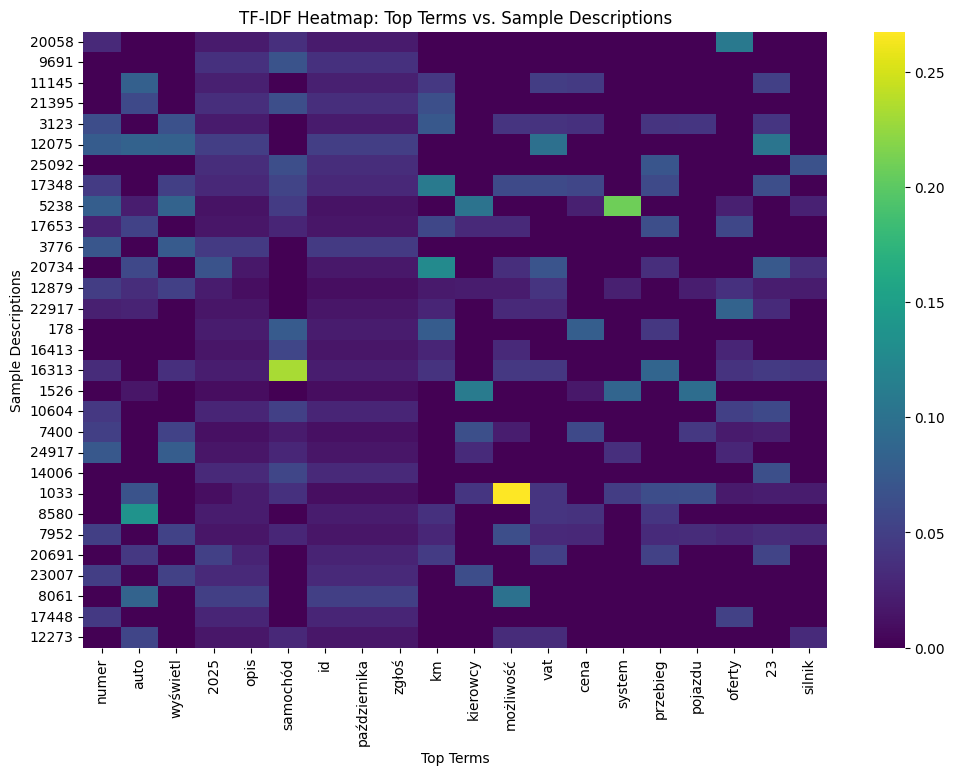

In [50]:
import seaborn as sns

N = 20
tfidf_means = np.asarray(tfidf_matrix.mean(axis=0)).flatten()
top_indices = np.argsort(tfidf_means)[::-1][:N]
top_terms = [vectorizer.get_feature_names_out()[i] for i in top_indices]

M = 30
sample_indices = np.random.choice(tfidf_matrix.shape[0], M, replace=False)
sample_matrix = tfidf_matrix[sample_indices][:, top_indices].toarray()

plt.figure(figsize=(12, 8))
sns.heatmap(sample_matrix, xticklabels=top_terms, yticklabels=sample_indices, cmap="viridis")
plt.title("TF-IDF Heatmap: Top Terms vs. Sample Descriptions")
plt.xlabel("Top Terms")
plt.ylabel("Sample Descriptions")
plt.show()


## Model training